#### ARTI 303 – Programming for AI (Assignment)
# Building a Basic Sentiment Analyzer with Python and TextBlob
____________________________________________________________________________________________


## Assessment Goal
The goal of this assessment is to design a simple text sentiment analyzer using Python and TextBlob.

## Assessment Weight
15% out of the total mark allocated for the course.

## Assessment Type
This is a **group** “practical” assignment, which means each group is expected to work on the assignment requirements on their own and submit their work based on their own efforts. Each group consists of **3-4 students**.
Assessment Specifications and Description
As the name suggests, sentiment analysis means to identify the view or emotion behind a situation. It basically means to analyze and find the emotion or intent behind a piece of text or speech or any mode of communication. In this Assessment, we will focus on the sentiment analysis of text data.
__________________________________________________________________________________________________

We, humans, communicate with each other in a variety of languages, and any language is just a mediator or a way in which we try to express ourselves. And, whatever we speak or write, has a sentiment associated with it. It might be positive or negative or it might be neutral as well.

Sentiment analysis has a wide range of applications across various industries. One of its most common uses is in the field of social media monitoring, where companies and brands leverage sentiment analysis to gain insights into customer opinions and reactions to their products or services. This information can help them make data-driven decisions, refine marketing strategies, and improve customer satisfaction. Sentiment analysis is also valuable in the financial sector, where it is used to analyze market sentiment and news sentiment to make more informed investment decisions. In the realm of customer support, sentiment analysis can be employed to gauge customer satisfaction and identify potential issues in real-time, allowing businesses to respond proactively. Moreover, sentiment analysis has applications in healthcare, politics, and even in the field of academic research to analyze public sentiment, assess public policies, and understand emotional trends within specific domains. Overall, sentiment analysis is a versatile tool that provides valuable insights into human emotions and opinions, making it applicable in a wide array of fields.

A simple sentiment analyzer can be built using TextBlob. TextBlob is a popular Python library for natural language processing (NLP) that simplifies the complexities of working with textual data. It offers a straightforward and user-friendly interface for various NLP tasks, including text classification, part-of-speech tagging, sentiment analysis, translation, and more. TextBlob is built on top of NLTK and Pattern, two other NLP libraries, making it easy to perform common NLP operations with just a few lines of code. It also provides a range of pre-trained models and datasets, making it accessible for users without extensive NLP expertise. Whether you need to analyze sentiment in customer reviews, categorize text documents, or perform basic language processing tasks, TextBlob is a versatile and efficient tool that simplifies NLP tasks in Python.

In this assessment, you are asked to develop an intelligent solution which classifies the sentiment in Amazon reviews. A potential user of the solution is a producer or a seller on Amazon who would like to analyze their product’s reviews. 

# Dataset Description
In this assessment, you will use a dataset of Amazon reviews of unlocked phone. PromptCloud extracted 400 thousand reviews of unlocked mobile phones sold on Amazon.com to find out insights with respect to reviews, ratings, price and their relationships. 

*You may access the dataset via this link https://www.kaggle.com/datasets/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones*

## Tools and libraries:
In this assessment, you will use the following tools and libraries:‎
- Python
- Pandas
- TextBlob

## Assessment Tasks

### Task1:

Write a Python function called `sentimentAnalyzer(text)`. This function takes a text (i.e review) and returns the sentiment as follow:

- Score < -0.2: returns **‘Negative’**
- Score between -0.2 and 0.2: returns **‘Neutral’**
- Score > 0.2: returns **‘Positive’**

The score is the polarity of text as determined by TextBlob. An example of creating a textblob object is:

`blob = TextBlob(text)`

*(Refer to TextBlob’s documentation to learn about determining polarity)*


In [10]:
from textblob import TextBlob

def sentimentAnalyzer(text):
    blob = TextBlob(text)                   
    score = blob.sentiment.polarity           

    if score < -0.2:
        return "Negative"
    elif -0.2 <= score <= 0.2:
        return "Neutral"
    else:
        return "Positive"


### Task 2:
Verify that the function does classify the sentiment correctly by passing the following words to the function:


|   Word        | Polarity | Resulting Sentiment |
|:-------------:|:--------:|:-------------------:|
| happy         |   0.8    |      Positive       |
| exciting      |   0.3    |      Positive       |
| good          |   0.7    |      Positive       |
| rich          |  0.375   |      Positive       |
| smile         |   0.3    |      Positive       |
| sad           |  -0.5    |      Negative       |
| disappointed  | -0.75    |      Negative       |
| bad           | -0.699   |      Negative       |
| poor          |  -0.4    |      Negative       |
| anger         |  -0.7    |      Negative       |
| food          |   0      |      Neutral        |
| animal        |   0      |      Neutral        |

In [11]:
words = [
    "happy", "exciting", "good", "rich", "smile",
    "sad", "disappointed", "bad", "poor", "anger",
    "food", "animal"
]

print(f"{'Word':<12}{'Polarity':<12}{'Resulting Sentiment'}")
print("-" * 40)

for word in words:
    blob = TextBlob(word)
    polarity = blob.sentiment.polarity
    sentiment = sentimentAnalyzer(word)

    print(f"{word:<15}{polarity:<15.3f}{sentiment}")


Word        Polarity    Resulting Sentiment
----------------------------------------
happy          0.800          Positive
exciting       0.300          Positive
good           0.700          Positive
rich           0.375          Positive
smile          0.300          Positive
sad            -0.500         Negative
disappointed   -0.750         Negative
bad            -0.700         Negative
poor           -0.400         Negative
anger          -0.700         Negative
food           0.000          Neutral
animal         0.000          Neutral


### Task 3:
Import the provided dataset into a Pandas DataFrame. Filter the data to only include one product of your choice. The product you select must have at least 1000 reviews. Then, describe the data related to your product. This includes:

- Product name
- Number of rows
- Number of columns
- Length of the shortest review, length of the longest review, and the average length of the review. ‎

In [13]:
## import pandas library:
import pandas as pd
## read csv file:
df = pd.read_csv(r"C:\Users\ariam\Downloads\archive\Amazon_Unlocked_Mobile.csv")
## file path chanchable depending on your device!

## set columns:
df.columns = df.columns.str.strip()
print("columns in the Amazon Dataset: ", df.columns.tolist())
product_column = "Product Name"
review_column = "Reviews"
products_counts = df[product_column].value_counts()

## The product you select must have at least 1000 reviews:
products_1000_reviews = products_counts[products_counts >= 1000]
selected_product = products_1000_reviews.index[0]
print("Selected Product: ", selected_product)
product_df = df[df[product_column] == selected_product].copy()

## Summarize data numerically (Product name|Number of rows|Number of columns|Length of the shortest review, length of the longest review, and the average length of the review):
product_df["review_length"] = product_df[review_column].astype(str).apply(len) #Product name.
num_rows = product_df.shape[0] #Number of rows.
num_columns = product_df.shape[1] #Number of columns.
min_length = product_df["review_length"].min() #Length of the shortest review.
max_length = product_df["review_length"].max() #length of the longest review.
average_length = product_df["review_length"].mean() #the average length of the review.

## print statements:
print("Product Name: ", selected_product)
print("Number of Rows: ", num_rows)
print("Number of Columns: ", num_columns)
print("The length of the shortest review: ", min_length)
print("The length of the longest review: ", max_length)
print("The average length of the review: ", round(average_length, 2))

columns in the Amazon Dataset:  ['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews', 'Review Votes']
Selected Product:  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)
Product Name:  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)
Number of Rows:  1451
Number of Columns:  7
The length of the shortest review:  1
The length of the longest review:  1465
The average length of the review:  107.38


### Task 4:
Apply the function sentimentAnalyzer(text)to the text column in your dataframe. This should create a new column in the dataframe called (Sentiment) which includes the sentiment for each review. 

In [14]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

# Task 4: sentimentAnalyzer function
def sentimentAnalyzer(text):
    blob = TextBlob(str(text))
    score = blob.sentiment.polarity

    if score < -0.2:
        return "Negative"
    elif score > 0.2:
        return "Positive"
    else:
        return "Neutral"

# Apply the function to the Reviews column
product_df["Sentiment"] = product_df["Reviews"].apply(sentimentAnalyzer)

# print first rows
product_df.head()


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,review_length,Sentiment
16429,Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP...,NaN,99.99,5,good buy,0.0,8,Positive
16430,Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP...,NaN,99.99,5,great phonegood price,0.0,21,Positive
16431,Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP...,NaN,99.99,1,I bought and send to Africa the two are not wo...,0.0,51,Neutral
16432,Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP...,NaN,99.99,4,Had difficulty connecting to wf,0.0,31,Neutral
16433,Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP...,NaN,99.99,5,very good,0.0,9,Positive


### Task 5:
Using visualization and summative statistics (in pandas and matlibplot), describe the results of the sentiment analysis of your product and analyze the results. This should include: 

- Visualizations of the results. For example, a bar chart showing number of documents with positive, negative, and neutral sentiment. Include any visualization you think is helpful. 
- Examples of reviews with positive, negative, and neural sentiment along with their polarity.
- Insights on what your client (producer or seller) need to do to minimize the negative sentiment and improve their reputation and product.
- Examples of reviews where you think TextBlob might have assigned the wrong sentiment to the review. Explain why you think this happened. Note: You may use the rating column to assess TextBlob’s sentiment. 

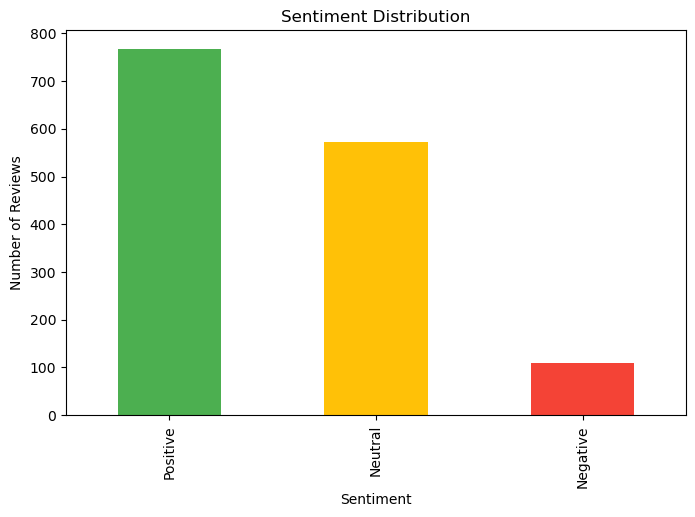

Sentiment Counts:
 Sentiment
Positive    768
Neutral     573
Negative    110
Name: count, dtype: int64 

🔵 Positive Examples:

Review: good buy
Polarity: 0.7

Review: great phonegood price
Polarity: 0.8

Review: very good
Polarity: 0.9099999999999999

🔴 Negative Examples:

Review: Bad batery
Polarity: -0.6999999999999998

Review: The phone stopped working after less than 30 days. I'm in Argentina and it's impossible to ship items from other countries in here. I guess it's a waste of time and money. Extremely dissapointed of my purchase and don't have any plans to shop again here.
Polarity: -0.25666666666666665

Review: I purchased this phone for my son on July 7 and on August 9 the phone conveniently died. It wouldn't charge at all and sits here as a tribute to my stupidity for listening to my teenage son who told me about purchasing a refurbished phone-- I know betterTHIS IS A SCAM! Do not buy this phone!
Polarity: -0.3

🟡 Neutral Examples:

Review: I bought and send to Africa the two

In [15]:
import matplotlib.pyplot as plt
from textblob import TextBlob


# 5.1 Visualization

sentiment_counts = product_df["Sentiment"].value_counts()

plt.figure(figsize=(8,5))
sentiment_counts.plot(kind="bar", color=["#4CAF50", "#FFC107", "#F44336"])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

print("Sentiment Counts:\n", sentiment_counts, "\n")



# 5.2 Examples with Polarity

def get_polarity(text):
    return TextBlob(str(text)).sentiment.polarity

print("🔵 Positive Examples:\n")
pos_examples = product_df[product_df["Sentiment"]=="Positive"].head(3)
for review in pos_examples["Reviews"]:
    print("Review:", review)
    print("Polarity:", get_polarity(review))
    print()

print("🔴 Negative Examples:\n")
neg_examples = product_df[product_df["Sentiment"]=="Negative"].head(3)
for review in neg_examples["Reviews"]:
    print("Review:", review)
    print("Polarity:", get_polarity(review))
    print()

print("🟡 Neutral Examples:\n")
neu_examples = product_df[product_df["Sentiment"]=="Neutral"].head(3)
for review in neu_examples["Reviews"]:
    print("Review:", review)
    print("Polarity:", get_polarity(review))
    print()



# 5.4 Misclassified Examples (Errors)

mistakes = product_df[
    ((product_df["Rating"] >= 4) & (product_df["Sentiment"] != "Positive")) |
    ((product_df["Rating"] <= 2) & (product_df["Sentiment"] != "Negative"))
]

print("\n⚠️ TextBlob Misclassification Examples:\n")
print(mistakes[["Rating", "Reviews", "Sentiment"]].head(10))


### Task 6
Export the dataframe to a csv file. 

In [16]:
product_df.to_csv("final_sentiment_results.csv", index=False)
print("CSV file exported successfully!")


CSV file exported successfully!


### Task 7
Write a technical report explaining the problem and outlining your results. Your ‎report should have the following:‎

- Title page
- Introduction
- Problem statement
- AI Solution
- Use case (the product you selected with the analysis results)‎
- Alignment between AI solution and client’s needs*‎
- Conclusion

* Your report must include a section which explains how the intelligent solution aligns with the client’s needs and requirements that are specified in the instructions (this document).


## Assessment Deadline:
The assignment is due: Thursday, December 4th , 2025.
## Assessment Deliverables:
You need to submit the complete notebook, your csv file (task 6), and assessment report.


@ 2025